In [1]:
import numpy as np
from pde import PDE, CartesianGrid, MemoryStorage, ScalarField, VectorField
from pde import FieldCollection, PDEBase, CartesianGrid
from scipy.stats import multivariate_normal

In [2]:
## Constants

# Grid extents
dims = 3
extents = [[-20, 20], [-20, 20], [0, 50]]
npoints = [40, 40, 50]

# PDE parameters
s = 10
r = 28
b = 8/3
sigma = 4/5
bc = {'value': 0}

# Initial PDF Configuration
mu = (-5.91652, -5.52332, 24)
cov = np.ones(dims)*5

In [3]:
# Initial PDF
x = [np.linspace(*extents[i], npoints[i]) for i in range(dims)]

mesh = np.meshgrid(*x, indexing='ij')
points = np.stack(mesh, axis=-1)

gaus_pdf = multivariate_normal(mean=mu, 
                               cov=cov).pdf

# Mesh grid
grid = CartesianGrid(extents, npoints)

# Initial scalar field
p0 = gaus_pdf(points)
field = ScalarField(grid, p0)

In [4]:
def scale(x):
    x_max = x.max()
    x_min = x.min()
    return (x - x_min)/(x_max - x_min)

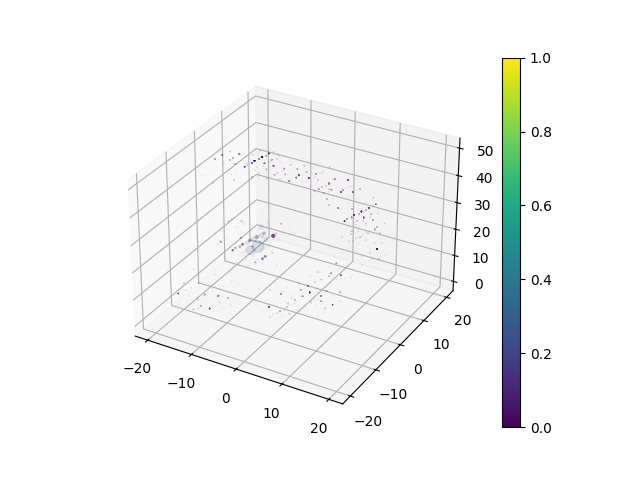

In [5]:
%matplotlib widget
import matplotlib.pyplot as plt
import matplotlib as mlp

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

x = [m.ravel() for m in mesh]
p1 = p0.ravel()

norm = mlp.colors.Normalize(vmin=p1.min(), vmax=p1.max())
scat = ax.scatter3D(*x, s=scale(p1)*200, c=norm(p1), cmap='viridis', alpha=scale(p1))
plt.colorbar(scat)

In [6]:
## Constants
for npoints in range(100, 1000, 100):
    # Grid extents
    dims = 1
    extents = [[-50, 50]]

    # PDE parameters
    bc = {'value': 0}

    # Initial PDF
    x = np.linspace(*extents[0], npoints)

    # Mesh grid
    grid = CartesianGrid(extents, npoints)

    field = ScalarField(grid, np.square(x))

    true_grad = 2*x

    diff = true_grad[1:npoints-1] - field.gradient(bc).data.flatten()[1:npoints-1]
    print(np.mean(np.square(diff)))


0.33323061585482533
0.0833269992124572
0.037035791426242755
0.02083294009191114
0.013333172476787844
0.009259181754756103
0.006802679280032857
0.005208308837699519
0.00411521105061489
